In [1]:
# NBA game evaluation program

# This code utilizes the NBA SportVU data to describe the game, including
# i) single player's moving route, ii) his relative position with teammates, 
# oppnents and ball, iii) the play maker during the possession. It aims to 
# provide a more comprehensive evaluation on the player, team and game, 
# potentially making predictions on the outcome of a game. 

# part 1 
# basic definition 
import json 
import pandas as pd 


In [10]:
# part 2
# import the nba data
# add = 'D:\r_question\nba\test.json'
with open('test.json','r') as f:
#     for line in f:
#         data = json.loads(line)
#         print(data)
    my_dict = json.load(f)
df = pd.DataFrame.from_dict(my_dict,orient='columns')
# mydict

In [167]:
# part 3
# illustrate the positition and time 

# select the event 
event_id = 0 # take the first event as the example
moment_id = 0 # take the first moment as the example
print(df.iloc[event_id]['gamedate'])

home_team = df.iloc[event_id]['events']['home']['name']
home_players = df.iloc[event_id]['events']['home']['players']
home_team_id = df.iloc[event_id]['events']['home']['teamid']

visitor_team = df.iloc[event_id]['events']['visitor']['name']
visitor_players = df.iloc[event_id]['events']['visitor']['players']
visitor_team_id = df.iloc[event_id]['events']['visitor']['teamid']

# select the moment information 
time_play = df.iloc[event_id]['events']['moments'][moment_id][3]
cor_moment = df.iloc[event_id]['events']['moments'][moment_id][5]

mo_ball_x = cor_moment[0][2]
mo_ball_y = cor_moment[0][3]
mo_ball_r = cor_moment[0][4]

mo_player = []
home_player = []
visitor_player = []
for ii in range(len(cor_moment)-1):
    team_id = cor_moment[ii+1][0]
    player_id_check = cor_moment[ii+1][1]
    
    # player identity
    if team_id == home_team_id:
        for jj in range(len(home_players)):
            if home_players[jj]['playerid'] == player_id_check:
                id_select = jj
        name_last = home_players[id_select]['lastname']
        name_first = home_players[id_select]['firstname']
        jersey = home_players[id_select]['jersey'] 
        color = '#061922' # later change
        home_player.append({'name_l':name_last,'name_f':name_first,
                          'jersey':jersey,'color':color,'cor_x':player_x,
                          'cor_y':player_y})

    else:
        for jj in range(len(visitor_players)):
            if visitor_players[jj]['playerid'] == player_id_check:
                id_select = jj
        name_last = visitor_players[id_select]['lastname']
        name_first = visitor_players[id_select]['firstname']
        jersey = visitor_players[id_select]['jersey'] 
        color = '#008384' # later change
        visitor_player.append({'name_l':name_last,'name_f':name_first,
                               'jersey':jersey,'color':color,
                               'cor_x':player_x,'cor_y':player_y})

    
    # player coordinate
    player_x = cor_moment[ii+1][2]
    player_y = cor_moment[ii+1][3]
    
    mo_player.append({'name_l':name_last,'name_f':name_first,'jersey':jersey,'color':color,'cor_x':player_x,'cor_y':player_y})


2016-01-04


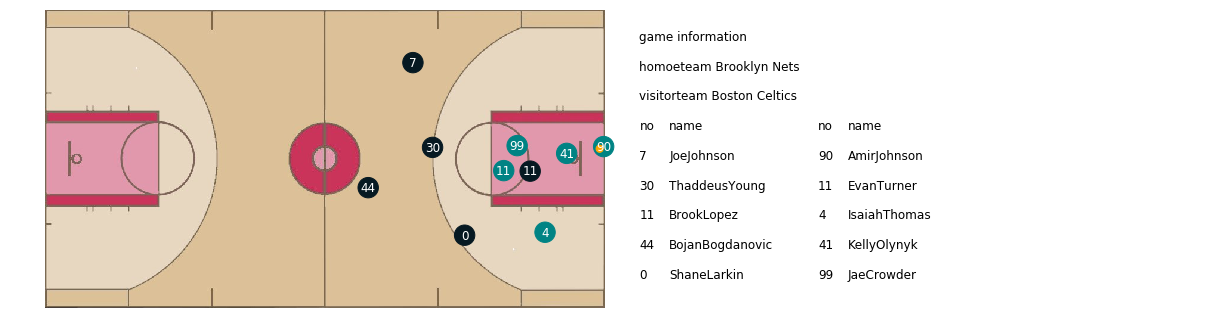

In [171]:
# print the picture 
import matplotlib.pyplot as plt
from matplotlib import animation
# from matplotlib.patches import Circle, Rectangle, Arc

# set the constant of the court 
x_min = 0
x_max = 94
y_min = 0
y_max = 50

# basic set up
ax = plt.axes(xlim=(x_min-3,x_max+100),
              ylim=(y_min,y_max))
ax.axis('off')
fig = plt.gcf()
fig.set_size_inches(21, 15) 

# drawing court
court = plt.imread('court.png')
plt.imshow(court,extent=[x_min,x_max,y_min,y_max])

# drawing players and basketball 
cir_ball = plt.Circle((mo_ball_x,mo_ball_y),mo_ball_r/7,color='orange')

for player in mo_player:
    cir_player = plt.Circle((player['cor_x'],player['cor_y']),12/7,
                            color= player['color'])
    ax.add_artist(cir_player)
    
    text_player = plt.text(player['cor_x'],player['cor_y'],
                           player['jersey'],fontsize = 12, color = 'white',
                          horizontalalignment='center', verticalalignment='center')
    
ax.add_artist(cir_ball)

# add text information 

text_game = plt.text(100, 45, 'game information', fontsize = 12)
text_team_home = plt.text(100, 40,'homoeteam '+home_team, fontsize = 12)
text_team_visitor = plt.text(100,35,'visitorteam '+visitor_team,fontsize = 12)
# text_player = plt.text(100,30,'on court', fontsize = 12)
plt.text(100,30,'no',fontsize = 12 )
plt.text(105,30,'name',fontsize = 12 )
plt.text(130,30,'no',fontsize = 12 )
plt.text(135,30,'name',fontsize = 12 )
label = 1
for player in home_player:
    plt.text(100, 30-5*label, player['jersey'], fontsize = 12)
    plt.text(105, 30-5*label, player['name_f'] + player['name_l'], fontsize = 12)
    label = label + 1

label = 1
for player in visitor_player:
    plt.text(130, 30-5*label, player['jersey'], fontsize = 12)
    plt.text(135, 30-5*label, player['name_f'] + player['name_l'], fontsize = 12)
    label = label + 1

fig.savefig('nba', dpi=100)

plt.show()

In [92]:
print(len(my_dict))
print(len(df))
print(df.keys())
print(df.shape)
game_moments = df.iloc[event_id]['events']['moments'][0]

game_moments
# len(game_moments)
len(cor_moment)
df.iloc[event_id]['events']['home']

3
485
Index(['gameid', 'gamedate', 'events'], dtype='object')
(485, 3)


{'abbreviation': 'BKN',
 'name': 'Brooklyn Nets',
 'players': [{'firstname': 'Joe',
   'jersey': '7',
   'lastname': 'Johnson',
   'playerid': 2207,
   'position': 'F-G'},
  {'firstname': 'Andrea',
   'jersey': '9',
   'lastname': 'Bargnani',
   'playerid': 200745,
   'position': 'C-F'},
  {'firstname': 'Thaddeus',
   'jersey': '30',
   'lastname': 'Young',
   'playerid': 201152,
   'position': 'F'},
  {'firstname': 'Brook',
   'jersey': '11',
   'lastname': 'Lopez',
   'playerid': 201572,
   'position': 'C'},
  {'firstname': 'Wayne',
   'jersey': '21',
   'lastname': 'Ellington',
   'playerid': 201961,
   'position': 'G'},
  {'firstname': 'Donald',
   'jersey': '15',
   'lastname': 'Sloan',
   'playerid': 202388,
   'position': 'G'},
  {'firstname': 'Bojan',
   'jersey': '44',
   'lastname': 'Bogdanovic',
   'playerid': 202711,
   'position': 'G-F'},
  {'firstname': 'Thomas',
   'jersey': '41',
   'lastname': 'Robinson',
   'playerid': 203080,
   'position': 'F'},
  {'firstname': 'Wil

In [85]:
game_moments[5]

[[-1, -1, 93.30098, 26.74225, 4.2138],
 [1610612751, 2207, 61.9093, 41.21856, 0.0],
 [1610612751, 201152, 65.21216, 26.96746, 0.0],
 [1610612751, 201572, 81.62229, 22.9754, 0.0],
 [1610612751, 202711, 54.39193, 20.19828, 0.0],
 [1610612751, 203499, 70.60156, 12.20396, 0.0],
 [1610612738, 101161, 93.97376, 27.10074, 0.0],
 [1610612738, 202323, 77.17922, 23.06356, 0.0],
 [1610612738, 202738, 84.12217, 12.70335, 0.0],
 [1610612738, 203482, 87.75752, 25.96225, 0.0],
 [1610612738, 203109, 79.43114, 27.26391, 0.0]]

In [172]:
print(df.shape)
# print(df.iloc[0]['events'])
df.iloc[400]['events']

(485, 3)


{'eventId': '478',
 'home': {'abbreviation': 'BKN',
  'name': 'Brooklyn Nets',
  'players': [{'firstname': 'Joe',
    'jersey': '7',
    'lastname': 'Johnson',
    'playerid': 2207,
    'position': 'F-G'},
   {'firstname': 'Andrea',
    'jersey': '9',
    'lastname': 'Bargnani',
    'playerid': 200745,
    'position': 'C-F'},
   {'firstname': 'Thaddeus',
    'jersey': '30',
    'lastname': 'Young',
    'playerid': 201152,
    'position': 'F'},
   {'firstname': 'Brook',
    'jersey': '11',
    'lastname': 'Lopez',
    'playerid': 201572,
    'position': 'C'},
   {'firstname': 'Wayne',
    'jersey': '21',
    'lastname': 'Ellington',
    'playerid': 201961,
    'position': 'G'},
   {'firstname': 'Donald',
    'jersey': '15',
    'lastname': 'Sloan',
    'playerid': 202388,
    'position': 'G'},
   {'firstname': 'Bojan',
    'jersey': '44',
    'lastname': 'Bogdanovic',
    'playerid': 202711,
    'position': 'G-F'},
   {'firstname': 'Thomas',
    'jersey': '41',
    'lastname': 'Robinson

In [59]:
print(len(df.iloc[0]['events']['moments']))
print(df.iloc[0]['events']['visitor']['name'])
print(df.iloc[0]['events']['visitor']['abbreviation'])
visitor_player = df.iloc[0]['events']['visitor']['players']
print(df.iloc[0]['events']['visitor']['players'])
# print(df.iloc[0]['events']['players'])
# for index in range(20):
#     print(df.iloc[0]['events']['moments'][index][2])

150
Boston Celtics
BOS
[{'lastname': 'Lee', 'firstname': 'David', 'playerid': 101135, 'jersey': '42', 'position': 'F-C'}, {'lastname': 'Johnson', 'firstname': 'Amir', 'playerid': 101161, 'jersey': '90', 'position': 'F'}, {'lastname': 'Jerebko', 'firstname': 'Jonas', 'playerid': 201973, 'jersey': '8', 'position': 'F'}, {'lastname': 'Turner', 'firstname': 'Evan', 'playerid': 202323, 'jersey': '11', 'position': 'G-F'}, {'lastname': 'Thomas', 'firstname': 'Isaiah', 'playerid': 202738, 'jersey': '4', 'position': 'G'}, {'lastname': 'Zeller', 'firstname': 'Tyler', 'playerid': 203092, 'jersey': '44', 'position': 'C-F'}, {'lastname': 'Sullinger', 'firstname': 'Jared', 'playerid': 203096, 'jersey': '7', 'position': 'C-F'}, {'lastname': 'Crowder', 'firstname': 'Jae', 'playerid': 203109, 'jersey': '99', 'position': 'F'}, {'lastname': 'Olynyk', 'firstname': 'Kelly', 'playerid': 203482, 'jersey': '41', 'position': 'C-F'}, {'lastname': 'Young', 'firstname': 'James', 'playerid': 203923, 'jersey': '13'

In [67]:
print(type(visitor_player))
print(len(visitor_player))
col = len(visitor_player)
player_id_check = 101135
for index in range(len(visitor_player)):
    if visitor_player[index]['playerid'] == player_id_check:
        id_select = index
print(visitor_player[id_select]['lastname'])
print(visitor_player[id_select]['firstname'])
# visitor_player.index('playerid'==101135)
visitor_player[0]

<class 'list'>
12
Lee
David


{'firstname': 'David',
 'jersey': '42',
 'lastname': 'Lee',
 'playerid': 101135,
 'position': 'F-C'}

In [52]:
for index in range(20):
    print(df.iloc[0]['events']['moments'][index][1])

1451954474003
1451954474043
1451954474084
1451954474124
1451954474164
1451954474204
1451954474243
1451954474283
1451954474324
1451954474364
1451954474403
1451954474443
1451954474484
1451954474524
1451954474563
1451954474604
1451954474644
1451954474683
1451954474723
1451954474763


In [25]:
df.iloc[100]['events']

'110'

In [17]:
len(df)

485